<a href="https://colab.research.google.com/github/feicccccccc/colab_sandbox/blob/master/MNIST_keras_fucntional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A testing to use colab to perform MNIST training using Keras

## First step: Import library including


1.   Keras (deeplearning framework)
2.   matplotlib (to plot graph)
3.   numpy



In [1]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Using TensorFlow backend.


### Get the MNIST data set from keras default dataloader

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


### Show part of the data set in term of pixel map and there output y

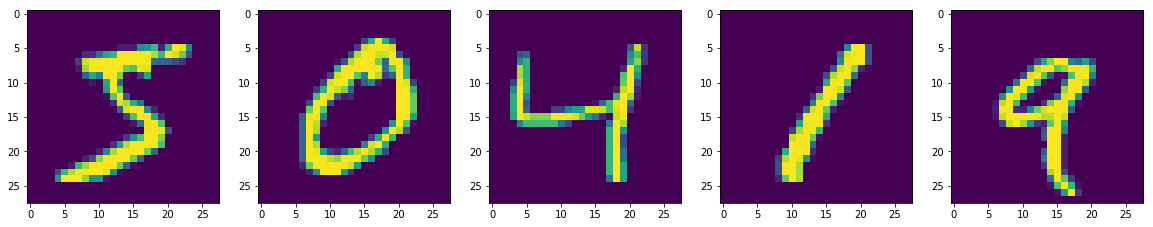

In [3]:
images=[x_train[0,:],x_train[1,:],x_train[2,:],x_train[3,:],x_train[4,:]]

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [4]:
print("First label  = ", y_train[0])
print("Second Label = ", y_train[1])
print("Third label  = ", y_train[2])
print("Forth label  = ", y_train[3])
print("Fifth label  = ", y_train[4])

First label  =  5
Second Label =  0
Third label  =  4
Forth label  =  1
Fifth label  =  9


### Data pre processing
### Normalise the raw data

In [5]:
print("Original data at x some pixel = ", x_train[0,7])

Original data at x some pixel =  [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
  93  82  82  56  39   0   0   0   0   0]


In [0]:
x_train_reshaped = x_train / 255
x_test_reshaped = x_test / 255

x_train_reshaped = x_train_reshaped.reshape(x_train.shape[0], 28, 28, 1)
x_test_reshaped = x_test_reshaped.reshape(x_test.shape[0], 28, 28, 1)

In [7]:
print("New data at x some pixel = ", x_train_reshaped[0,7])

New data at x some pixel =  [[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.19215686]
 [0.93333333]
 [0.99215686]
 [0.99215686]
 [0.99215686]
 [0.99215686]
 [0.99215686]
 [0.99215686]
 [0.99215686]
 [0.99215686]
 [0.98431373]
 [0.36470588]
 [0.32156863]
 [0.32156863]
 [0.21960784]
 [0.15294118]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


### Transform the output to one-hot data encoding

In [0]:
from keras.utils import to_categorical

y_train_reshaped = to_categorical(y_train, 10)
y_test_reshaped = to_categorical(y_test, 10)

In [10]:
print("one hot encoding for the first training data = ", y_train_reshaped[0])

one hot encoding for the first training data =  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Create the model using Keras API

### Get the input and output dimension from the input data

In [11]:
print("shape of the training sample = ", x_train_reshaped.shape)
print("shape of the output lable = ", y_train_reshaped.shape)

m , n_w, n_h, n_c = x_train_reshaped.shape
_ , n_y = y_train_reshaped.shape


shape of the training sample =  (60000, 28, 28, 1)
shape of the output lable =  (60000, 10)


### Create model (computational graph)

In [0]:
from keras.models import Model
from keras.layers import Input,Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

inputs = None
x = None

inputs = Input(shape=(28,28,1,))

x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(inputs)
z = Conv2D(filters=32, kernel_size=(5,5))(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)

## Compile the model and define the loss fuunction and gradient descent method.

In [0]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

### Summary of the model

In [30]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)          0         
__________

### computational graph of the model

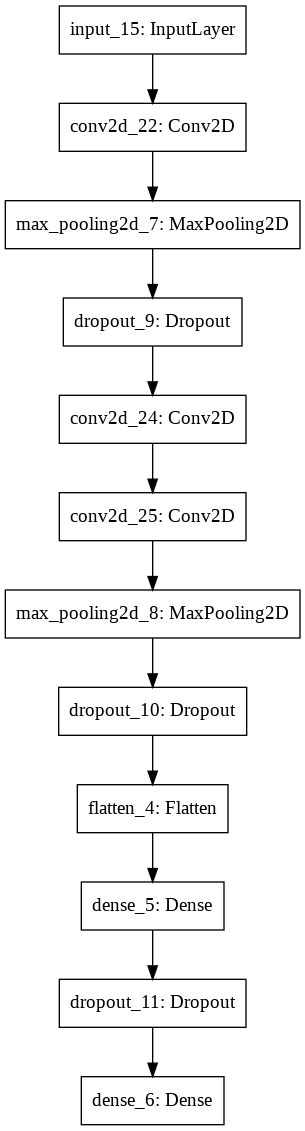

In [31]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model.png')
Image(filename='model.png') 

# Train the model

In [32]:
model.fit(x_train_reshaped, y_train_reshaped, epochs=10, batch_size=512)

W0702 14:11:04.580143 140059078715264 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.4911 - acc: 0.8425
Epoch 2/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.1220 - acc: 0.9629
Epoch 3/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0858 - acc: 0.9741
Epoch 4/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0676 - acc: 0.9799
Epoch 5/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0554 - acc: 0.9824
Epoch 6/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0489 - acc: 0.9846
Epoch 7/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0439 - acc: 0.9862
Epoch 8/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0394 - acc: 0.9881
Epoch 9/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0368 - acc: 0.9883
Epoch 10/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0349 - acc: 0.989

## Test model performance

In [33]:
score = model.evaluate(x_test_reshaped, y_test_reshaped, batch_size=128)
print("loss, mertric = ", score)

10000/10000 [==============================] - 0s 35us/step
loss, mertric =  [0.01873857682829257, 0.9935]


## input Example:

Model output =  [[4.7993254e-08 1.0360588e-06 8.5110621e-08 8.8287925e-06 4.5696110e-04
  9.7665497e-07 1.2018132e-09 1.6786676e-03 4.5057600e-06 9.9784887e-01]]
The input character =  [9]


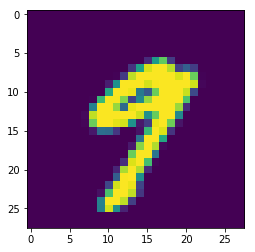

In [34]:
sample_idx = 20

image= x_test[sample_idx,:]

plt.imshow(image)

foo = np.expand_dims(x_test_reshaped[sample_idx,:], axis=0)

predict = model.predict(foo)

print("Model output = ", predict)

result = np.where(predict == np.amax(predict))

print("The input character = ", result[1])

# Try upload your own image and test the ConvNet

### you can create the image in the follwing websit: 

http://kleki.com

Please use a larger brush or the storke will disappear after resize. (around 75)

The follwing code will automatically resize the image and fed it into the network for prediction

In [35]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 2019_06_30_Kleki (4).png to 2019_06_30_Kleki (4).png
User uploaded file "2019_06_30_Kleki (4).png" with length 53150 bytes


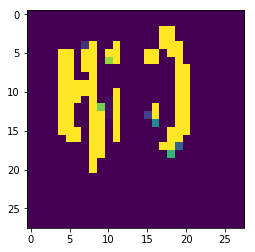

Model output =  [[3.6484888e-01 5.4134708e-04 2.0885865e-01 7.0308184e-04 1.0543698e-01
  1.5966801e-03 8.8417502e-05 9.1485538e-02 2.9637970e-02 1.9680236e-01]]
The input character =  [0]


In [36]:
import cv2

def inverse_color(image):

    height,width = image.shape
    img2 = image.copy()

    for i in range(height):
        for j in range(width):
            img2[i,j] = (255-image[i,j]) 
    return img2

img = cv2.imread(fn)
resized_img = cv2.resize(img, (28, 28))
gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
gray = inverse_color(gray)

plt.imshow(gray)
plt.show()

normalised_img = gray / 255

foo2 = np.expand_dims(np.expand_dims(normalised_img, axis=0), axis=-1)

predict_user = model.predict(foo2)

print("Model output = ", predict_user)

result_user = np.where(predict_user == np.amax(predict_user))

print("The input character = ", result_user[1])